In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import missingno as msno
import autoreload
import matplotlib.pyplot as plt
import os
import csv
import sys

from collections import defaultdict, Counter

sb.set_style("darkgrid")
sb.set(font_scale=1.2)

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

### World Happiness Report
#### Working on the happiness dataset to perform EDA and visualization
#### Already import all required Libraries and modules above.
#### Now we import data

In [2]:
df = pd.read_csv(r"D:\Open Classroom\Data Files\World Happiness Report\2015.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Brainstorm the dataset and explore statistical infor-

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
round(df.describe(), -1)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0
mean,80.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,80.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,120.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,160.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Elaborate the correlation between columns
#### In this case, Pearson's Rank of Correlation is used

Text(0.5, 1.0, "Pearson's Rank of Correlation for the Dataset Columns\n")

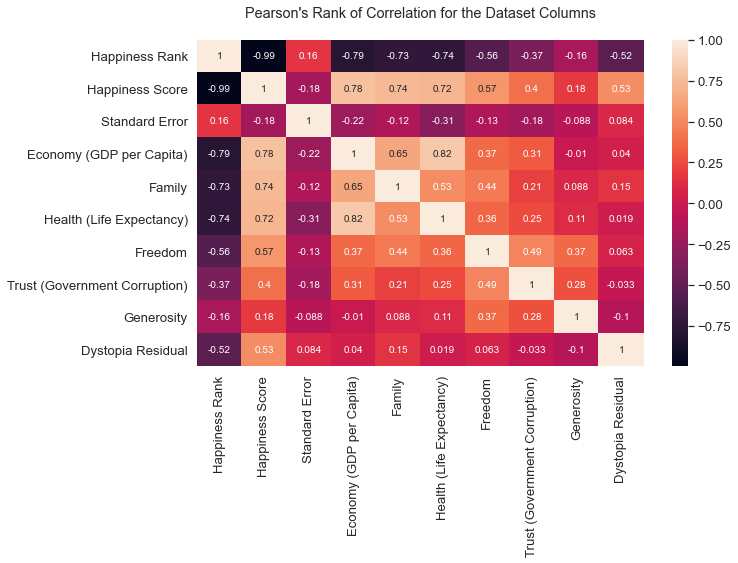

In [6]:
plt.figure(figsize = (10, 6))
sb.heatmap(df.corr(), annot = True)
#plt.xticks(rotation = -45)
plt.title("Pearson's Rank of Correlation for the Dataset Columns\n")

#### Plotting the Non-Identity Relations between columns

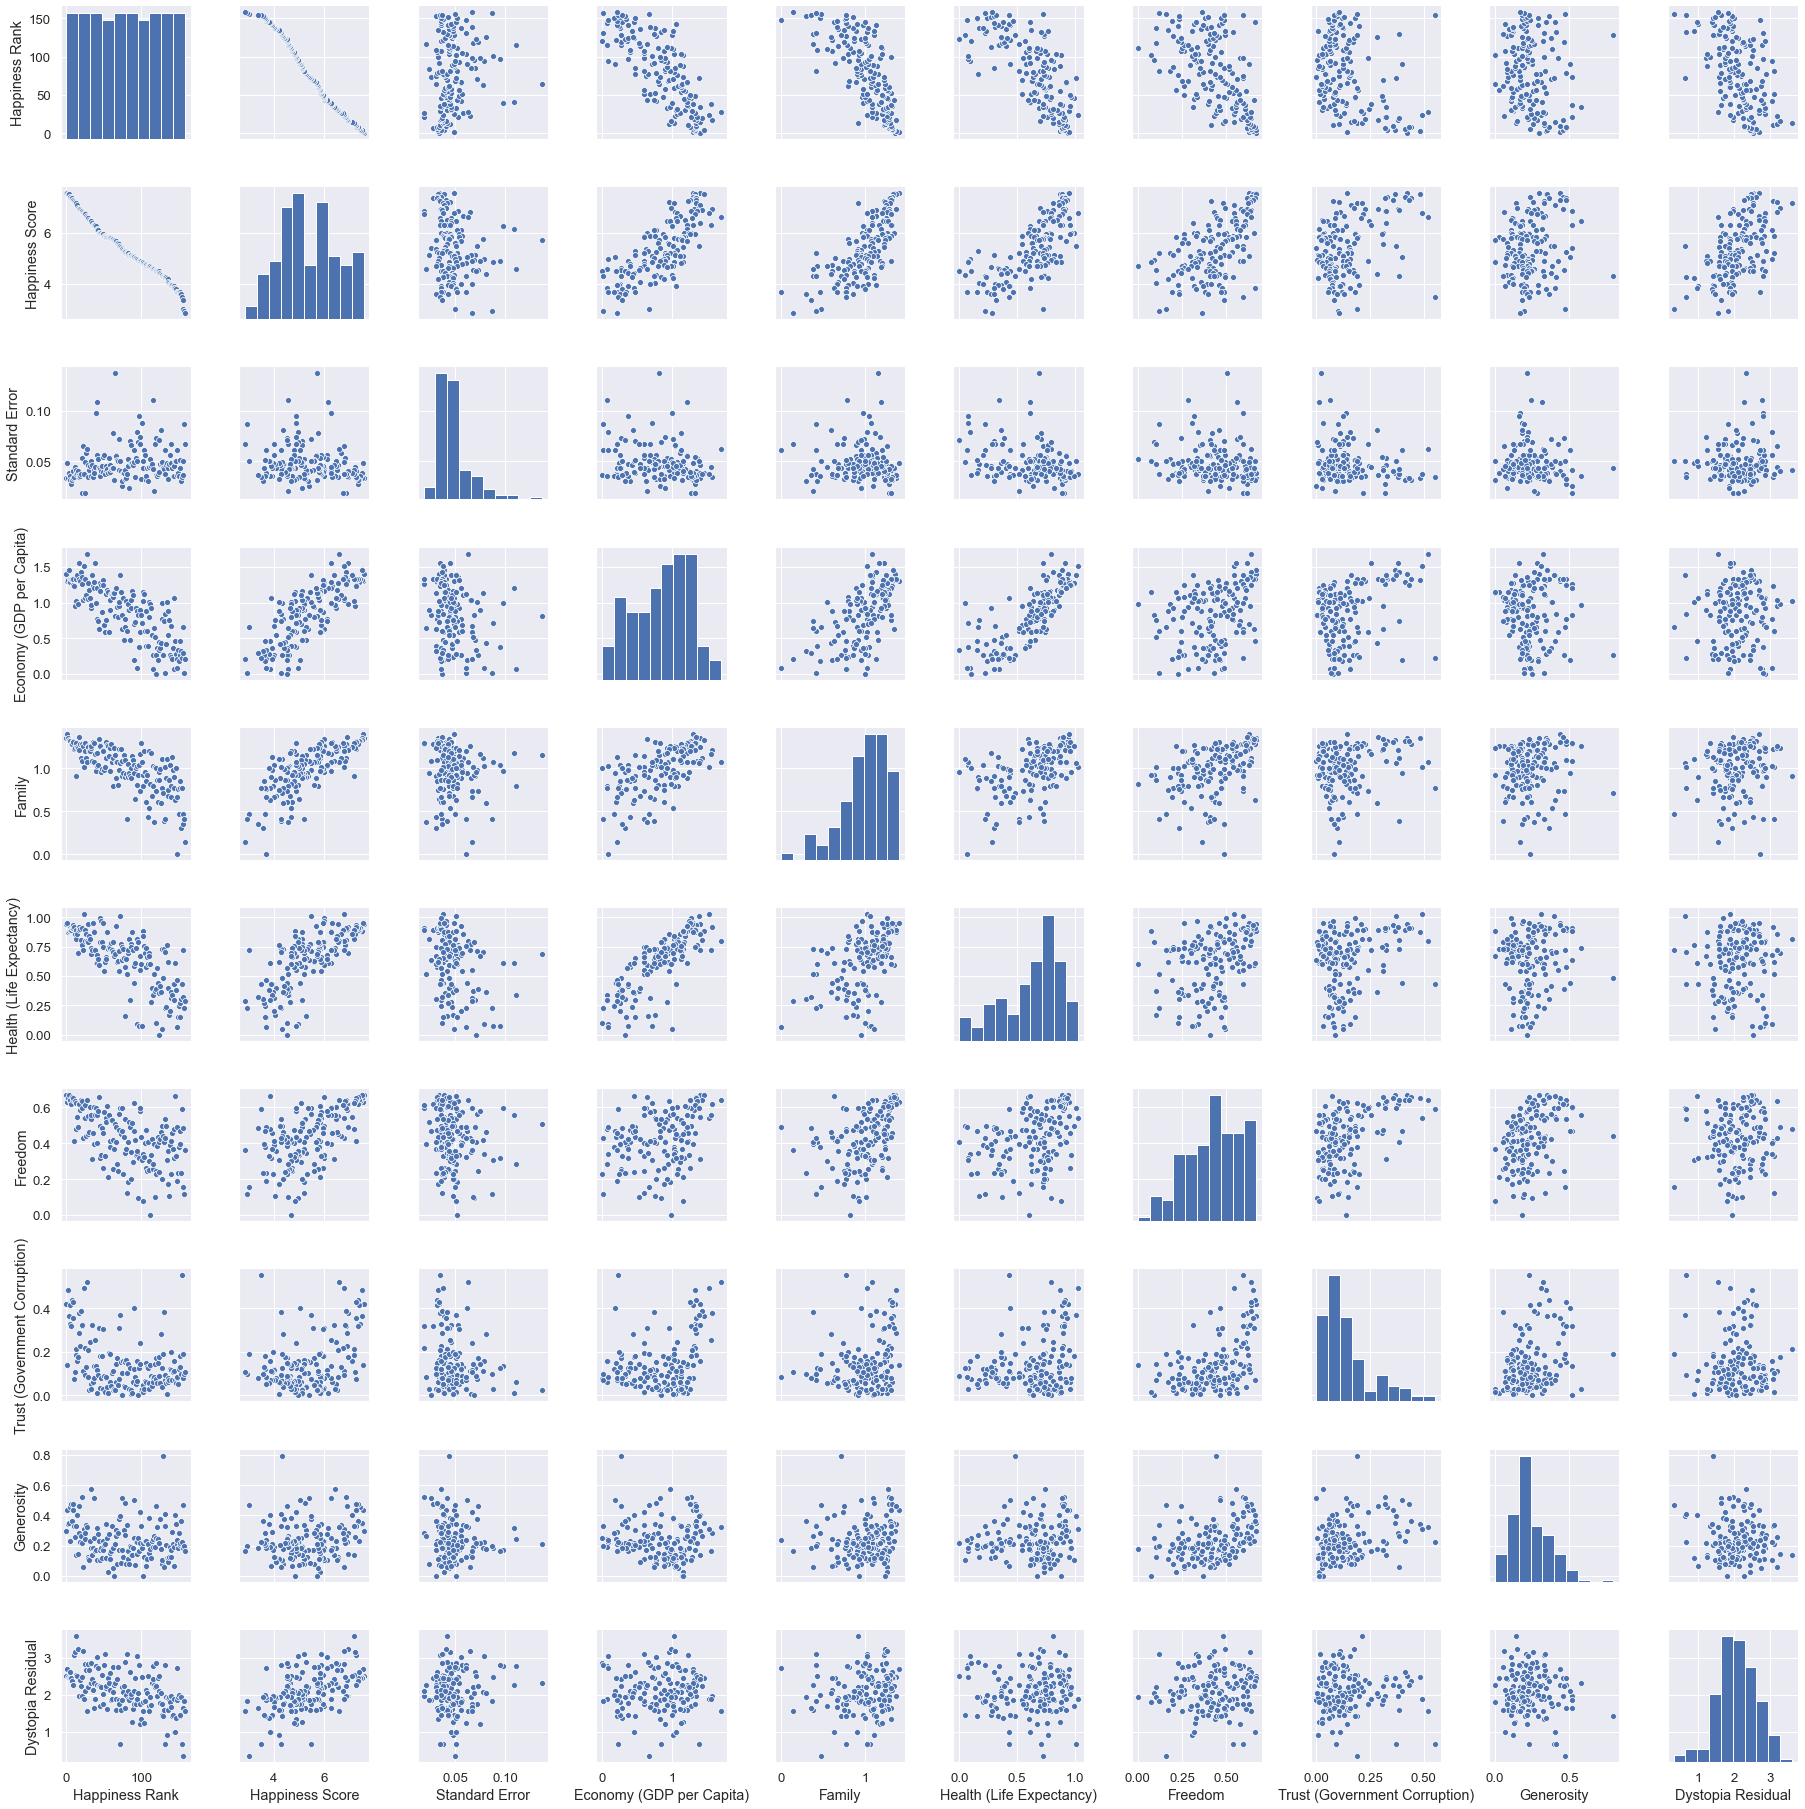

In [7]:
sb.pairplot(df)

In [8]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### We start Analysis after data cleaning
#### Since the dataset had zero null values and outliers, data cleaning wasn't performed

In [9]:
df["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [10]:
reg = df.groupby("Region")
sub_saharan = reg.get_group("Sub-Saharan Africa")
sub_saharan["Country"].value_counts()
sub_saharan.shape
sub_saharan.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
70,Mauritius,Sub-Saharan Africa,71,5.477,0.07197,1.00761,0.98521,0.70950,0.56066,0.07521,0.37744,1.76145
77,Nigeria,Sub-Saharan Africa,78,5.268,0.04192,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233,2.89319
84,Zambia,Sub-Saharan Africa,85,5.129,0.06988,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,2.63430
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032
93,Mozambique,Sub-Saharan Africa,94,4.971,0.07896,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137


#### Performing Visualization on analysed data

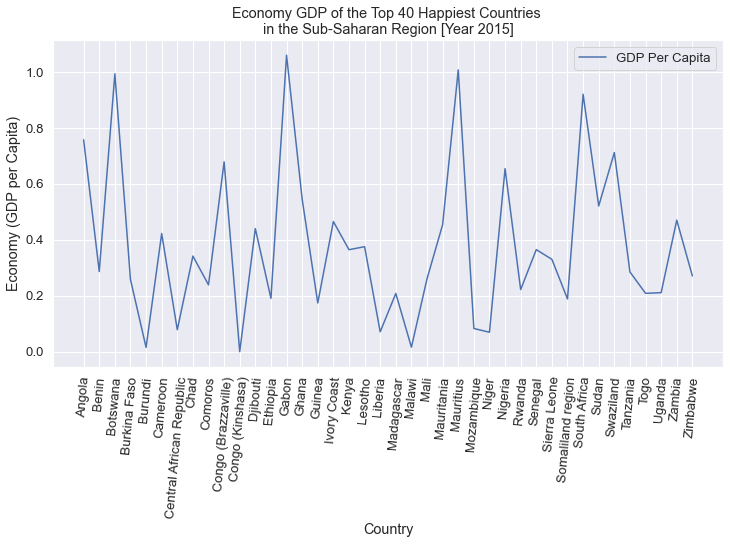

In [11]:
plt.figure(figsize = (12, 6))
sb.lineplot(x = sub_saharan["Country"].sort_values(), y = sub_saharan["Economy (GDP per Capita)"], data = sub_saharan, label = "GDP Per Capita")
plt.xticks(rotation = 85)
plt.title("Economy GDP of the Top 40 Happiest Countries \nin the Sub-Saharan Region [Year 2015]")
plt.legend(loc = "best")

#### Brief Report
#### According to the above graphic presentation, We focus on the Happiest Countries in Sub-saharan Africa where we note that Gabon, Mauritius, Botswana and South Africa had the highest GDP Per Capita respectively

Text(0.5, 1.0, 'Life Expectancy of the Top Happiest Countries in \nSub-Saharan Africa')

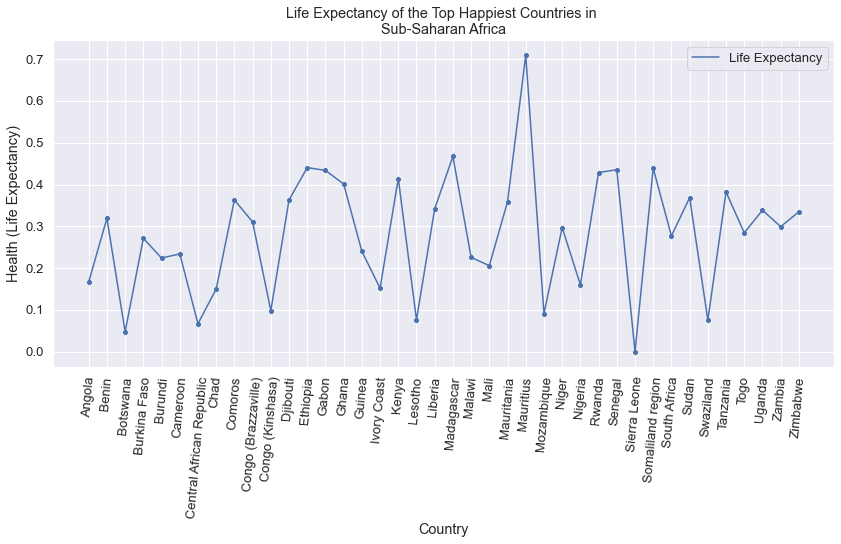

In [12]:
plt.figure(figsize = (14, 6))
sb.lineplot(x = sub_saharan["Country"], y = sub_saharan["Health (Life Expectancy)"], data = sub_saharan, label = "Life Expectancy")
sb.scatterplot(x = sub_saharan["Country"], y = sub_saharan["Health (Life Expectancy)"], data = sub_saharan)
plt.xticks(rotation = 85)
plt.title("Life Expectancy of the Top Happiest Countries in \nSub-Saharan Africa")

#### In 2015, Muaritius had the highest Life Expectancy rate compared to all other sub-saharan countries listed in the top happiest countries in the world. On the other hand, Sierra Leone had the Lowest Life Expectancy rate in the sub-saharan region.

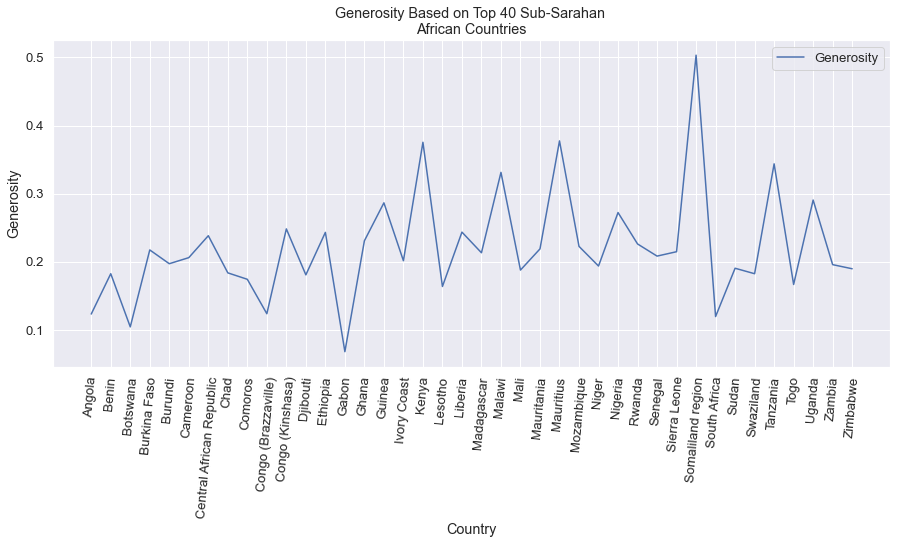

In [13]:
plt.figure(figsize = (15, 6))
sb.lineplot(x = sub_saharan["Country"], y = sub_saharan["Generosity"], data = sub_saharan, label = "Generosity")
plt.xticks(rotation = 85)
plt.title("Generosity Based on Top 40 Sub-Sarahan \nAfrican Countries")
plt.legend(loc = "best")

#### The Genrosity report focused on the happiest sub-saharan countries, Somaliland takes the topmost rank, while Kenya and Mauritius tie at the second rank as Tanzania comes in 3rd. From the bottom, Gabon leads the chart followed by Botswana then South Africa. Information dated in 2015

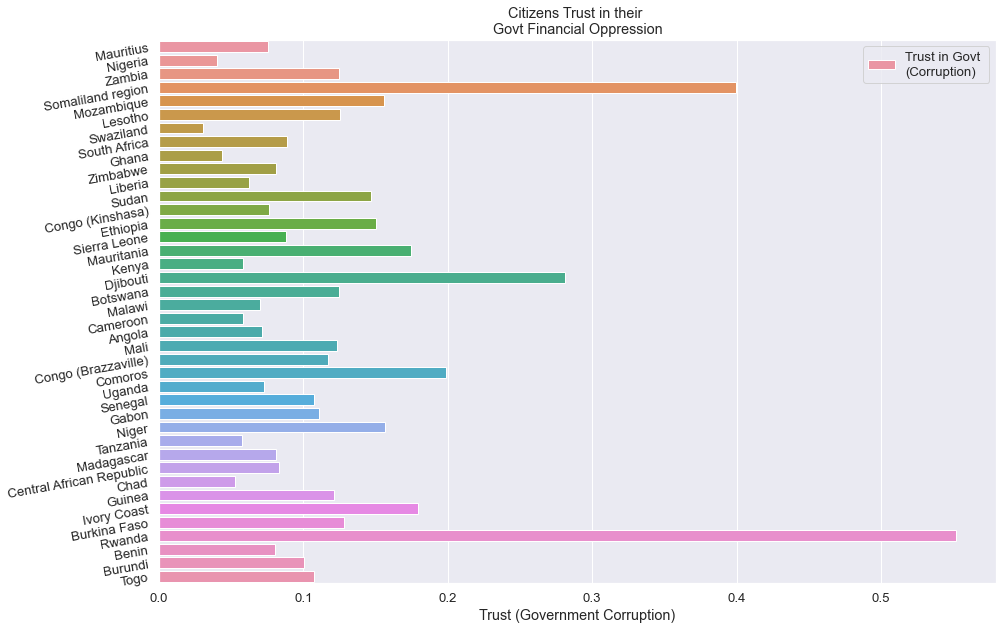

In [14]:
#Financial Oppression
plt.figure(figsize = (15, 10))
sb.barplot(x = sub_saharan["Trust (Government Corruption)"], y = sub_saharan["Country"], data = sub_saharan, label = "Trust in Govt \n(Corruption)")
plt.yticks(rotation = 10)
plt.ylabel(ylabel = None)
plt.title("Citizens Trust in their \nGovt Financial Oppression")
plt.legend(loc = "best")

#### We take a look at how Sub-saharan countries are corrupt and the rate at which respective citizens trust the govt.
#### Rwanda having the topmost rank in trusting their govt with public funds, Somaliland comes 2nd while Djibouti comes 3rd. 
#### The margin between the countries is massive showing that out of 10 sub-saharan countries atleast 9 suffer financial oppression from their govts. 

In [15]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [16]:
world_happiness = reg["Happiness Rank"].sum()
world_happiness

Region
Australia and New Zealand            19
Central and Eastern Europe         2291
Eastern Asia                        387
Latin America and Caribbean        1032
Middle East and Northern Africa    1552
North America                        20
Southeastern Asia                   731
Southern Asia                       792
Sub-Saharan Africa                 5116
Western Europe                      620
Name: Happiness Rank, dtype: int64

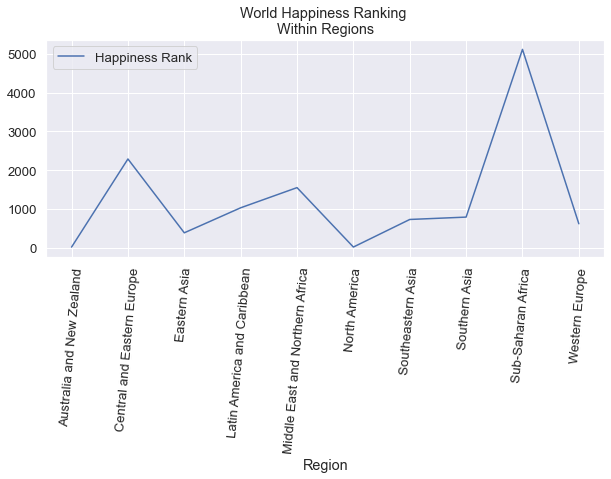

In [17]:
plt.figure(figsize = (10, 4))
sb.lineplot(x = world_happiness.index, y = world_happiness.values, label = "Happiness Rank")
plt.xticks(rotation = 85)
plt.title("World Happiness Ranking \nWithin Regions")
plt.legend(loc = "best")

([], <a list of 0 Text major ticklabel objects>)

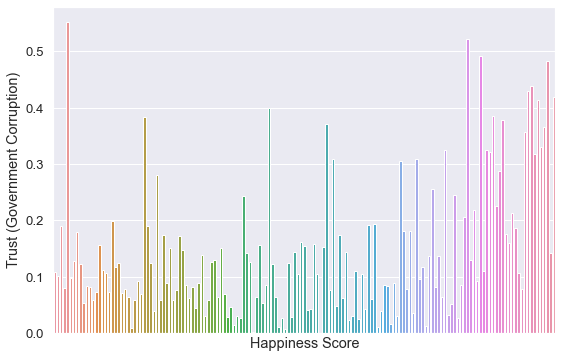

In [18]:
plt.figure(figsize = (9, 6))
sb.barplot(x = df["Happiness Score"], y = df["Trust (Government Corruption)"]) #, hue = df["Region"])
plt.xticks([])

#### World Happiness Report 2021

In [57]:
df = pd.read_csv("D:\Open Classroom\Data Files\World Happiness 2021\world-happiness-report-2021.csv")
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [58]:
df.shape

(149, 20)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

#### Data Cleaning

In [60]:
df.columns = df.columns.str.lower()
df.head()

,country name,regional indicator,ladder score,standard error of ladder score,upperwhisker,lowerwhisker,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption,ladder score in dystopia,explained by: log gdp per capita,explained by: social support,explained by: healthy life expectancy,explained by: freedom to make life choices,explained by: generosity,explained by: perceptions of corruption,dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [61]:
df.rename(columns = {"country name": "country", "regional indicator": "region", 
                          "ladder score": "ladder_score", "standard error of ladder score": "SE_ladder_score",
                          "upperwhisker": "upper_whisker", "lowerwhisker": "lower_whiske", 
                          "logged gdp per capita": "gdp_per_capita", "social support": "social_support",
                          "healthy life expectancy": "healthy_life_expectancy", "freedom to make life choices": "freedom_to_make_life_choices", 
                          "perceptions of corruption": "perceptions_of_corruption", "ladder score in dystopia": "ladder_score_in_dystopia", 
                          "explained by: log gdp per capita": "log_gdp_per_capita", "explained by: social support": "social_support", 
                          "explained by: healthy life expectancy": "healthy_life_expectancy", 
                          "explained by: freedom to make life choices": "freedom_to_make_life_choices"}, inplace = True)

In [62]:
df.head()

,country,region,ladder_score,SE_ladder_score,upper_whisker,lower_whiske,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,explained by: generosity,explained by: perceptions of corruption,dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


Text(0.5, 1.0, 'Correlation Relationship of Columns')

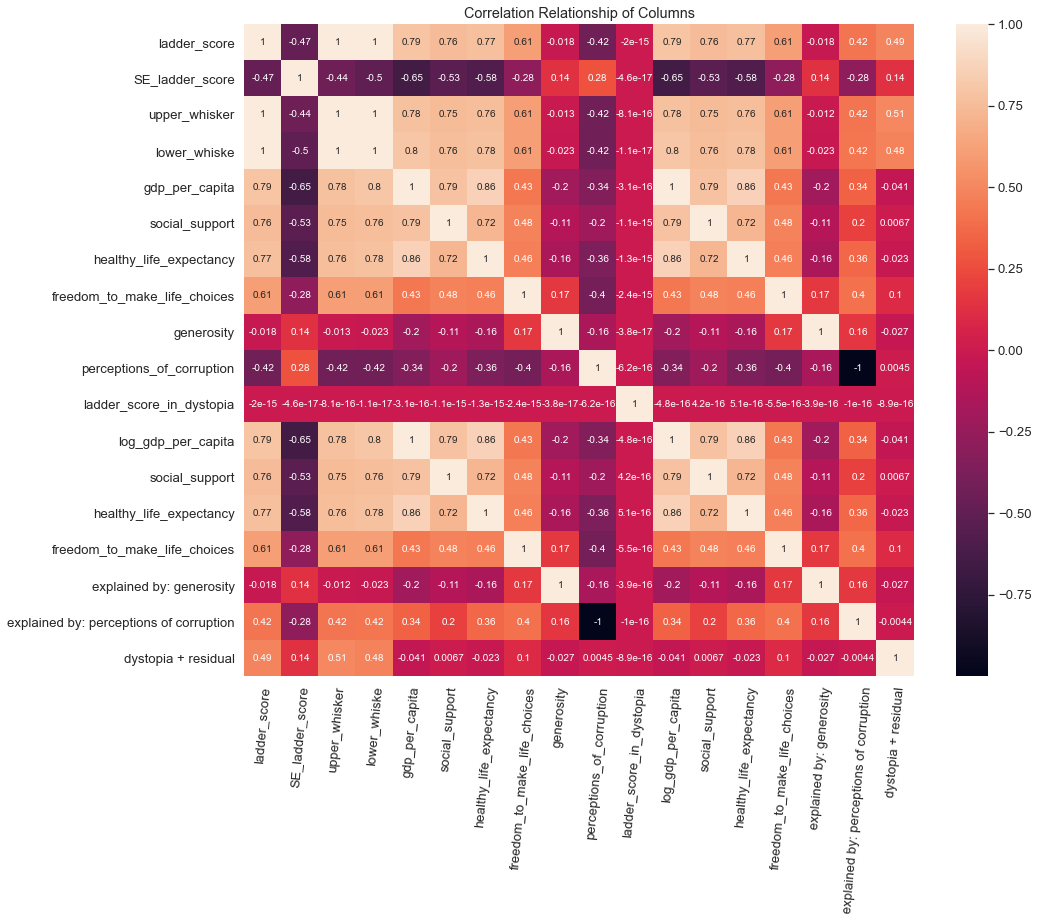

In [69]:
plt.figure(figsize = (15, 12))
sb.heatmap(df.corr(), annot = True)
plt.xticks(rotation = 85)
plt.title("Correlation Relationship of Columns")

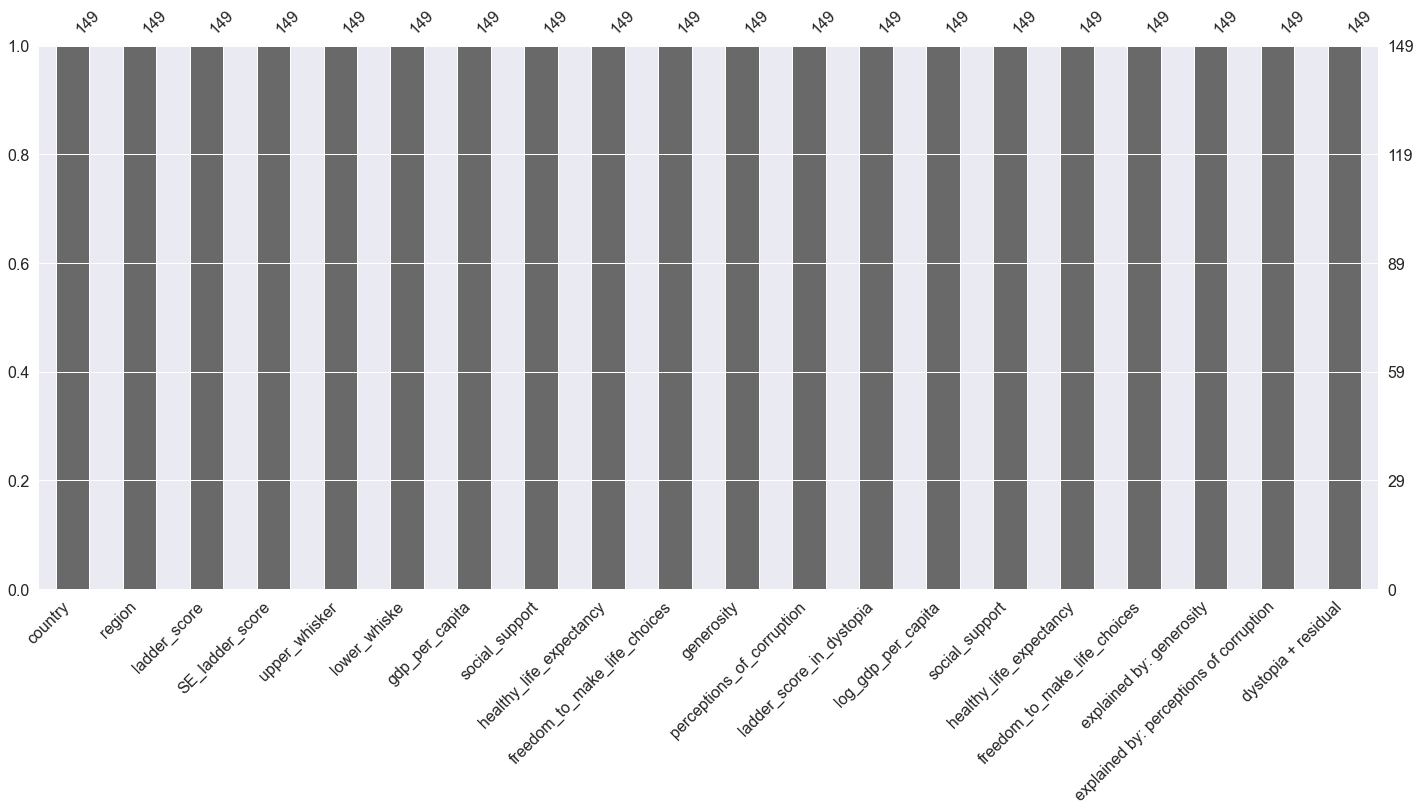

In [70]:
msno.bar(df)

In [71]:
df.head()

,country,region,ladder_score,SE_ladder_score,upper_whisker,lower_whiske,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,explained by: generosity,explained by: perceptions of corruption,dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [98]:
reg = df.groupby("region")
get_reg = reg.get_group("Western Europe")
get_reg["country"].head()

0        Finland
1        Denmark
2    Switzerland
3        Iceland
4    Netherlands
Name: country, dtype: object